## Importing Stock and Crypto Data

In [110]:
#Import Libraries
import os
from pathlib import Path
import json
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import hvplot.pandas
%matplotlib inline

In [111]:
# Alpaca API
load_dotenv("../../WBF.env")
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

## Stock Data

In [112]:
# Pulling Stock Price Data

# Variables
end = pd.Timestamp("2021-04-30", tz="America/New_York").isoformat()
start = pd.Timestamp("2019-11-30", tz="America/New_York").isoformat()
timeframe = "1D"
tickers = ['MSFT', 'DIS', 'NFLX', 'MA', 'XOM']

# Stock Price DataFrame
stock_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df

stock_df.index = stock_df.index.date

In [113]:
# Closing Prices DF for Stock Portfolio: stock_returns
stock_closing = pd.DataFrame()
stock_closing["MSFT"] = stock_df["MSFT"]["close"]
stock_closing["DIS"] = stock_df["DIS"]["close"]
stock_closing["NFLX"] = stock_df["NFLX"]["close"]
stock_closing["MA"] = stock_df["MA"]["close"]
stock_closing["XOM"] = stock_df["XOM"]["close"]

stock_returns = stock_closing.pct_change().dropna()
stock_returns.head()

,MSFT,DIS,NFLX,MA,XOM
2019-12-03,-0.001538,-0.013930,-0.012548,0.001116,-0.007890
2019-12-04,0.003415,-0.002489,-0.006043,-0.000731,0.011046
2019-12-05,0.000601,-0.005598,-0.004634,0.010806,-0.003496
2019-12-06,0.012207,0.001356,0.014528,0.001172,0.015933
2019-12-09,-0.002570,-0.009956,-0.015591,-0.004409,0.002302


In [114]:
# Adding Column for Average Daily Returns
stock_returns = stock_returns.copy()
stock_returns['Stock Avg'] = stock_returns.mean(numeric_only=True, axis=1)
stock_returns.head()

,MSFT,DIS,NFLX,MA,XOM,Stock Avg
2019-12-03,-0.001538,-0.013930,-0.012548,0.001116,-0.007890,-0.006958
2019-12-04,0.003415,-0.002489,-0.006043,-0.000731,0.011046,0.001039
2019-12-05,0.000601,-0.005598,-0.004634,0.010806,-0.003496,-0.000464
2019-12-06,0.012207,0.001356,0.014528,0.001172,0.015933,0.009039
2019-12-09,-0.002570,-0.009956,-0.015591,-0.004409,0.002302,-0.006045


## Crypto Data

In [115]:
# Fetch API Key from Environment Variables
api_key = os.getenv('alpha_api_key')

In [116]:
# Request Data From API
btc_url = "https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=USD&apikey=" + api_key
btc_data = requests.get(btc_url).json()

eth_url = "https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=ETH&market=USD&apikey=" + api_key
eth_data = requests.get(eth_url).json()

ltc_url = "https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=LTC&market=USD&apikey=" + api_key
ltc_data = requests.get(ltc_url).json()

link_url = "https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=LINK&market=USD&apikey=" + api_key
link_data = requests.get(link_url).json()

doge_url = "https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=DOGE&market=USD&apikey=" + api_key
doge_data = requests.get(doge_url).json()

In [117]:
# Create DataFrames
btc_df = pd.DataFrame.from_dict(btc_data['Time Series (Digital Currency Daily)'], orient='index')
eth_df = pd.DataFrame.from_dict(eth_data['Time Series (Digital Currency Daily)'], orient='index')
ltc_df = pd.DataFrame.from_dict(ltc_data['Time Series (Digital Currency Daily)'], orient='index')
link_df = pd.DataFrame.from_dict(link_data['Time Series (Digital Currency Daily)'], orient='index')
doge_df = pd.DataFrame.from_dict(doge_data['Time Series (Digital Currency Daily)'], orient='index')

In [118]:
# Clean DataFrames
btc_df.dropna(inplace=True)
btc_df.rename(columns={
    '4a. close (USD)':'BTC close',
}, inplace=True)
btc_df = btc_df[['BTC close']]
btc_df.sort_index(inplace=True)

eth_df.dropna(inplace=True)
eth_df.rename(columns={
    '4a. close (USD)':'ETH close',
}, inplace=True)
eth_df = eth_df[['ETH close']]
eth_df.sort_index(inplace=True)

ltc_df.dropna(inplace=True)
ltc_df.rename(columns={
    '4a. close (USD)':'LTC close',
}, inplace=True)
ltc_df = ltc_df[['LTC close']]
ltc_df.sort_index(inplace=True)

link_df.dropna(inplace=True)
link_df.rename(columns={
    '4a. close (USD)':'LINK close',
}, inplace=True)
link_df = link_df[['LINK close']]
link_df.sort_index(inplace=True)

doge_df.dropna(inplace=True)
doge_df.rename(columns={
    '4a. close (USD)':'DOGE close',
}, inplace=True)
doge_df = doge_df[['DOGE close']]
doge_df.sort_index(inplace=True)

In [119]:
# Concatenate DataFrames
crypto_ohlc = pd.concat([btc_df, eth_df, ltc_df, link_df, doge_df], axis='columns', join='inner')
crypto_ohlc["BTC close"]= crypto_ohlc["BTC close"].astype(float)
crypto_ohlc["ETH close"]= crypto_ohlc["ETH close"].astype(float)
crypto_ohlc["LTC close"]= crypto_ohlc["LTC close"].astype(float)
crypto_ohlc["LINK close"]= crypto_ohlc["LINK close"].astype(float)
crypto_ohlc["DOGE close"]= crypto_ohlc["DOGE close"].astype(float)

In [120]:
# Crypto Closing Prices DataFrame
crypto_ohlc = crypto_ohlc['2019-11-30':'2021-04-30']
crypto_ohlc.head()

,BTC close,ETH close,LTC close,LINK close,DOGE close
2019-11-30,7541.89,151.37,47.21,2.2373,0.002292
2019-12-01,7390.89,150.73,47.45,2.1638,0.002265
2019-12-02,7294.28,148.65,45.45,2.0911,0.002219
2019-12-03,7292.71,147.17,44.75,2.1222,0.002178
2019-12-04,7194.32,145.38,44.67,2.0290,0.002168


In [121]:
# Crypto Daily Returns DataFrame
crypto_returns = crypto_ohlc.pct_change().dropna()

In [123]:
# Adding Column for Average Daily Returns
crypto_returns = crypto_returns.copy()
crypto_returns['Crypto Avg'] = crypto_returns.mean(numeric_only=True, axis=1)
crypto_returns.head()

,BTC close,ETH close,LTC close,LINK close,DOGE close,Crypto Avg
2019-12-01,-0.020022,-0.004228,0.005084,-0.032852,-0.011781,-0.012760
2019-12-02,-0.013071,-0.013800,-0.042150,-0.033598,-0.020046,-0.024533
2019-12-03,-0.000215,-0.009956,-0.015402,0.014873,-0.018564,-0.005853
2019-12-04,-0.013492,-0.012163,-0.001788,-0.043917,-0.004591,-0.015190
2019-12-05,0.027060,0.018710,0.003134,-0.010941,0.003367,0.008266


### S&P 500 Data

In [147]:
csvpath = Path("SP500_PriceData - Sheet1 (3).csv")
sp500_df = pd.read_csv(csvpath)
sp500_df.set_index(pd.to_datetime(sp500_df['Date'], infer_datetime_format=True), inplace=True)
sp500_df.drop(columns=['Date'], inplace=True)
sp500_returns_df = sp500_df.pct_change()
sp500_returns_df = sp500_returns_df.rename(columns={"Close": "S&P 500"})
sp500_returns_df = sp500_returns_df.dropna()
sp500_returns_df.index = sp500_returns_df.index.date

### Standard Deviations

In [124]:
# Standard Deviations for Each Stock
stock_std = stock_returns.std()
stock_std.sort_values(ascending=False)

XOM          0.030084
NFLX         0.028559
DIS          0.027506
MA           0.026856
MSFT         0.024596
Stock Avg    0.020994
dtype: float64

In [125]:
# Standard Deviations for Cryptocurrencies
crypto_std = crypto_returns.std()
crypto_std.sort_values(ascending=False)

DOGE close    0.196385
LINK close    0.067637
Crypto Avg    0.060490
LTC close     0.054185
ETH close     0.052605
BTC close     0.040412
dtype: float64

### Annualized Standard Deviations

In [126]:
# Annualized Standard Deviations for Each Stock
annualized_stock_std = stock_std * np.sqrt(252)
annualized_stock_std.sort_values(ascending=False)

XOM          0.477563
NFLX         0.453361
DIS          0.436641
MA           0.426324
MSFT         0.390452
Stock Avg    0.333268
dtype: float64

In [127]:
# Annualized Standard Deviations for Crypto Portfolio
annualized_crypto_std = crypto_std * np.sqrt(365)
annualized_crypto_std.sort_values(ascending=False)

DOGE close    3.751935
LINK close    1.292201
Crypto Avg    1.155664
LTC close     1.035194
ETH close     1.005008
BTC close     0.772070
dtype: float64

### Rolling Standard Deviaitions

In [129]:
# 20-Day Rolling Standard Deviations for Stock Portfolio
rolling_stock_std = stock_returns.rolling(window=20).std().dropna()
rolling_stock_std.head()

,MSFT,DIS,NFLX,MA,XOM,Stock Avg
2019-12-31,0.005724,0.008067,0.017691,0.005718,0.008981,0.006330
2020-01-02,0.006897,0.009619,0.017725,0.006587,0.009346,0.007259
2020-01-03,0.007879,0.009940,0.017944,0.007143,0.009378,0.007857
2020-01-06,0.007861,0.009942,0.018794,0.006860,0.009418,0.007934
2020-01-07,0.007976,0.009934,0.019193,0.006934,0.009059,0.008023


In [130]:
# 20-Day Rolling Standard Deviations for Crypto Portfolio
rolling_crypto_std = crypto_returns.rolling(window=20).std().dropna()
rolling_crypto_std.head()

,BTC close,ETH close,LTC close,LINK close,DOGE close,Crypto Avg
2019-12-20,0.029038,0.034134,0.037775,0.046877,0.017360,0.029631
2019-12-21,0.028765,0.034125,0.037674,0.046842,0.017510,0.029612
2019-12-22,0.030944,0.035736,0.039238,0.047169,0.017990,0.030935
2019-12-23,0.031504,0.036242,0.039611,0.047296,0.017822,0.031373
2019-12-24,0.031404,0.036239,0.039608,0.046447,0.018058,0.031275


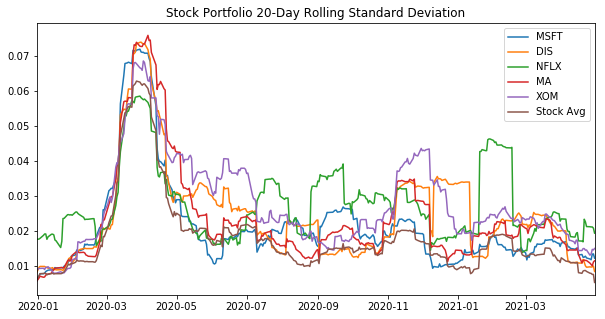

In [133]:
# Plot for 20-Day Rolling Standard Deviations for Stock Portfolio
rolling_stock_std.plot(figsize=(10,5), title="Stock Portfolio 20-Day Rolling Standard Deviation")

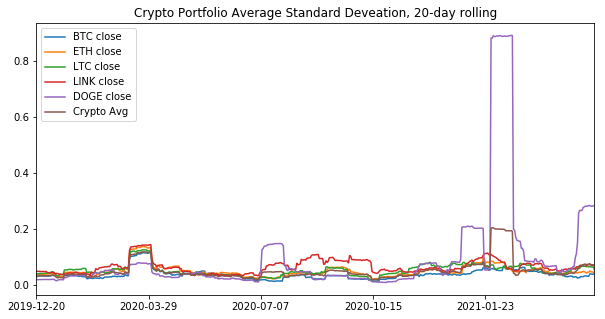

In [134]:
# Plot for 20-Day Rolling Standard Deviations for Crypto Portfolio
rolling_crypto_std.plot(figsize=(10,5), title="Crypto Portfolio Average Standard Deveation, 20-day rolling")

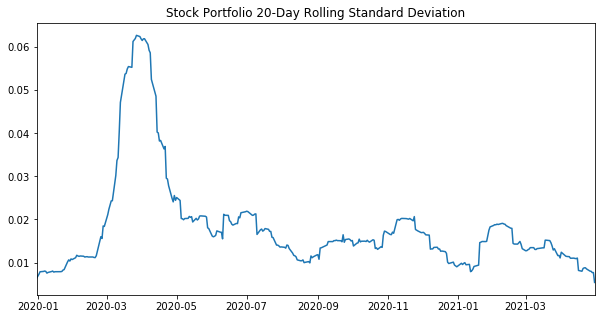

In [136]:
# Plot for 20-Day Rolling Standard Deviations for Stock Portfolio
rolling_stock_std['Stock Avg'].plot(figsize=(10,5), title="Stock Portfolio 20-Day Rolling Standard Deviation")

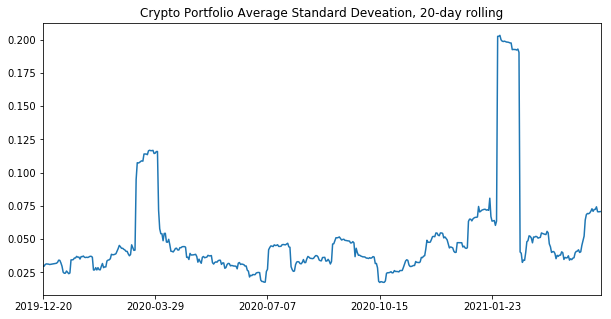

In [137]:
# Plot for 20-Day Rolling Standard Deviations for Crypto Portfolio
rolling_crypto_std['Crypto Avg'].plot(figsize=(10,5), title="Crypto Portfolio Average Standard Deveation, 20-day rolling")

### Beta Analysis

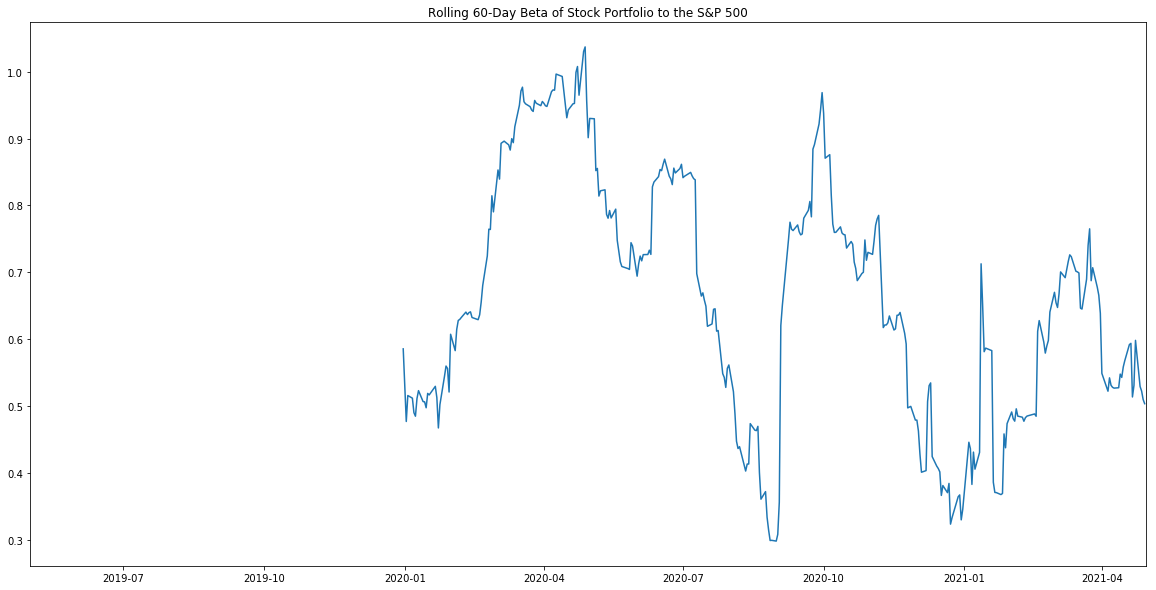

In [158]:
# Beta for Stock Portfolio
rolling_covariance_stock = stock_returns['Stock Avg'].rolling(window=20).cov(sp500_returns_df['S&P 500'])
rolling_variance_stock = stock_returns['Stock Avg'].rolling(window=20).var()
beta_stock = rolling_covariance_stock / rolling_variance_stock

beta_stock.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Stock Portfolio to the S&P 500')

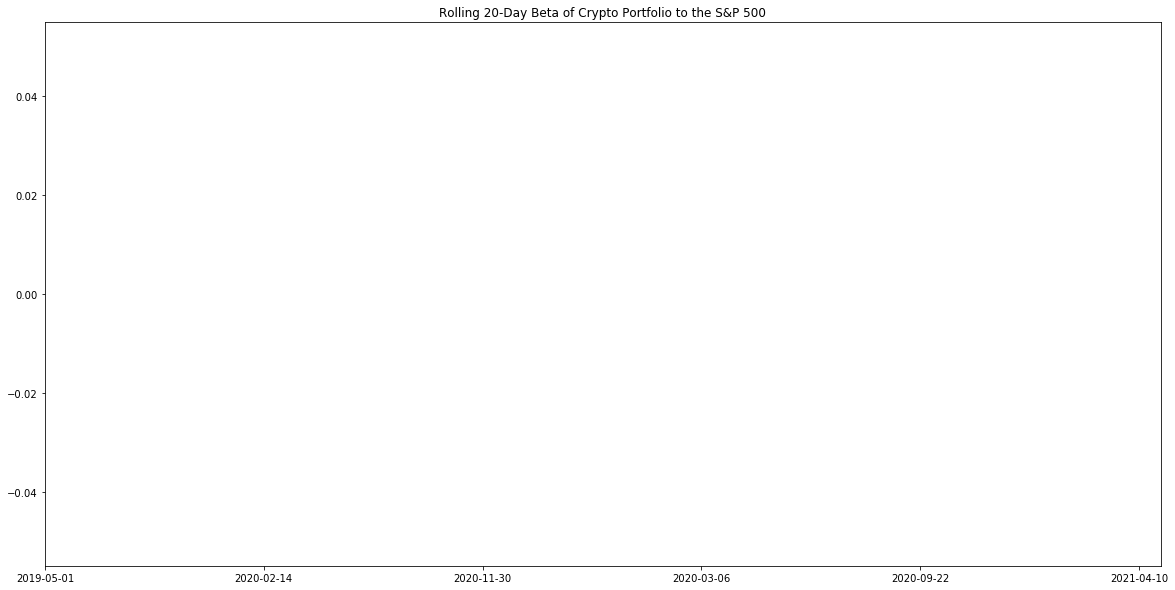

In [161]:
rolling_covariance_crypto = crypto_returns['Crypto Avg'].rolling(window=20).cov(sp500_returns_df['S&P 500'])
rolling_variance_crypto = crypto_returns['Crypto Avg'].rolling(window=20).var()
beta_crypto = rolling_covariance_crypto / rolling_variance_crypto

beta_crypto.plot(figsize=(20, 10), title='Rolling 20-Day Beta of Crypto Portfolio to the S&P 500')

In [173]:
beta_crypto

2019-05-01   NaN
2019-05-02   NaN
2019-05-03   NaN
2019-05-06   NaN
2019-05-07   NaN
2019-05-08   NaN
2019-05-09   NaN
2019-05-10   NaN
2019-05-13   NaN
2019-05-14   NaN
2019-05-15   NaN
2019-05-16   NaN
2019-05-17   NaN
2019-05-20   NaN
2019-05-21   NaN
2019-05-22   NaN
2019-05-23   NaN
2019-05-24   NaN
2019-05-28   NaN
2019-05-29   NaN
2019-05-30   NaN
2019-05-31   NaN
2019-06-03   NaN
2019-06-04   NaN
2019-06-05   NaN
2019-06-06   NaN
2019-06-07   NaN
2019-06-10   NaN
2019-06-11   NaN
2019-06-12   NaN
              ..
2021-04-01   NaN
2021-04-02   NaN
2021-04-03   NaN
2021-04-04   NaN
2021-04-05   NaN
2021-04-06   NaN
2021-04-07   NaN
2021-04-08   NaN
2021-04-09   NaN
2021-04-10   NaN
2021-04-11   NaN
2021-04-12   NaN
2021-04-13   NaN
2021-04-14   NaN
2021-04-15   NaN
2021-04-16   NaN
2021-04-17   NaN
2021-04-18   NaN
2021-04-19   NaN
2021-04-20   NaN
2021-04-21   NaN
2021-04-22   NaN
2021-04-23   NaN
2021-04-24   NaN
2021-04-25   NaN
2021-04-26   NaN
2021-04-27   NaN
2021-04-28   N

In [174]:
covariance_crypto = crypto_returns['Crypto Avg'].cov(sp500_returns_df['S&P 500'])
variance_crypto = crypto_returns['Crypto Avg'].var()
beta_crypto = covariance_crypto / variance_crypto

In [175]:
beta_crypto

nan

In [176]:
covariance_crypto = crypto_returns['Crypto Avg'].cov(sp500_returns_df['S&P 500'])

In [179]:
sp500_returns_df['S&P 500']

2019-05-01   -0.007502
2019-05-02   -0.002124
2019-05-03    0.009638
2019-05-06   -0.004471
2019-05-07   -0.016512
2019-05-08   -0.001605
2019-05-09   -0.003021
2019-05-10    0.003720
2019-05-13   -0.024131
2019-05-14    0.008016
2019-05-15    0.005839
2019-05-16    0.008895
2019-05-17   -0.005837
2019-05-20   -0.006749
2019-05-21    0.008496
2019-05-22   -0.002824
2019-05-23   -0.011914
2019-05-24    0.001354
2019-05-28   -0.008376
2019-05-29   -0.006912
2019-05-30    0.002098
2019-05-31   -0.013195
2019-06-03   -0.002765
2019-06-04    0.021432
2019-06-05    0.008162
2019-06-06    0.006136
2019-06-07    0.010498
2019-06-10    0.004660
2019-06-11   -0.000350
2019-06-12   -0.002038
                ...   
2021-03-18   -0.014761
2021-03-19   -0.000603
2021-03-22    0.007025
2021-03-23   -0.007631
2021-03-24   -0.005467
2021-03-25    0.005240
2021-03-26    0.016631
2021-03-29   -0.000868
2021-03-30   -0.003158
2021-03-31    0.003623
2021-04-01    0.011825
2021-04-05    0.014438
2021-04-06 

In [178]:
crypto_returns['Crypto Avg']

2019-12-01   -0.012760
2019-12-02   -0.024533
2019-12-03   -0.005853
2019-12-04   -0.015190
2019-12-05    0.008266
2019-12-06    0.016776
2019-12-07   -0.009134
2019-12-08    0.008947
2019-12-09   -0.011540
2019-12-10    0.005684
2019-12-11   -0.012728
2019-12-12   -0.005524
2019-12-13    0.001690
2019-12-14   -0.024059
2019-12-15    0.013243
2019-12-16   -0.049776
2019-12-17   -0.071801
2019-12-18    0.078348
2019-12-19   -0.025841
2019-12-20    0.017029
2019-12-21   -0.010970
2019-12-22    0.039734
2019-12-23   -0.026056
2019-12-24   -0.008101
2019-12-25   -0.011330
2019-12-26    0.006841
2019-12-27    0.009897
2019-12-28    0.015489
2019-12-29    0.014088
2019-12-30   -0.019588
                ...   
2021-04-01    0.046872
2021-04-02    0.027483
2021-04-03   -0.060385
2021-04-04    0.034583
2021-04-05    0.044995
2021-04-06    0.039833
2021-04-07   -0.074593
2021-04-08    0.046983
2021-04-09   -0.013445
2021-04-10    0.052743
2021-04-11    0.045084
2021-04-12   -0.022238
2021-04-13 

In [145]:
stock_returns.head()

,MSFT,DIS,NFLX,MA,XOM,Stock Avg
2019-12-03,-0.001538,-0.013930,-0.012548,0.001116,-0.007890,-0.006958
2019-12-04,0.003415,-0.002489,-0.006043,-0.000731,0.011046,0.001039
2019-12-05,0.000601,-0.005598,-0.004634,0.010806,-0.003496,-0.000464
2019-12-06,0.012207,0.001356,0.014528,0.001172,0.015933,0.009039
2019-12-09,-0.002570,-0.009956,-0.015591,-0.004409,0.002302,-0.006045


In [146]:
sp500_returns_df.head()

,S&P 500
2019-04-30,NaN
2019-05-01,-0.007502
2019-05-02,-0.002124
2019-05-03,0.009638
2019-05-06,-0.004471


In [144]:
crypto_returns.head()

,BTC close,ETH close,LTC close,LINK close,DOGE close,Crypto Avg
2019-12-01,-0.020022,-0.004228,0.005084,-0.032852,-0.011781,-0.012760
2019-12-02,-0.013071,-0.013800,-0.042150,-0.033598,-0.020046,-0.024533
2019-12-03,-0.000215,-0.009956,-0.015402,0.014873,-0.018564,-0.005853
2019-12-04,-0.013492,-0.012163,-0.001788,-0.043917,-0.004591,-0.015190
2019-12-05,0.027060,0.018710,0.003134,-0.010941,0.003367,0.008266


## Crypto DataFrame

In [150]:
combined_df

,S&P 500,MSFT,DIS,NFLX,MA,XOM,Stock Avg,BTC close,ETH close,LTC close,LINK close,DOGE close,Crypto Avg
